In [14]:
import xgboost as xgb
import numpy as np
import pandas as pd
import pickle as pkl
from sklearn import metrics
import matplotlib.pylab as plt
%matplotlib inline

In [17]:
path = "../../../Google Drive/Data_science/NYU/Machine Learning/ML Project (Collisions)/data_for_training/v2/" #Joe
#path = "../../../../Google Drive/ML Project (Collisions)/" # Joyce
# path = "" # Lucas

In [26]:
def modelfit(alg, train_X, train_y, val_X=None, val_y=None, early_stopping_rounds=50):
    
    val_check = (not val_X is None)
    
    # Fit the algorithm on the data
    print(alg.get_params)
    alg.fit(train_X, train_y, eval_metric='auc')
        
    # Predict training set:
    dtrain_predictions = alg.predict(train_X)
    dtrain_predprob = alg.predict_proba(train_X)[:,1]

    # Predict val set:
    if val_check:
        dval_predictions = alg.predict(val_X)
        dval_predprob = alg.predict_proba(val_X)[:,1]
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(train_y, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(train_y, dtrain_predprob))

    if val_check:
        print("\nAccuracy : %.4g" % metrics.accuracy_score(val_y, dval_predictions))
        print("AUC Score (Val): %f" % metrics.roc_auc_score(val_y, dval_predprob))
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [18]:
train_X = pkl.load(open(path+'normalized_1hot/train_X.pkl','rb'))
train_y = pkl.load(open(path+'normalized_1hot/train_y.pkl','rb'))

val_X = pkl.load(open(path+'normalized_1hot/val_X.pkl','rb'))
val_y = pkl.load(open(path+'normalized_1hot/val_y.pkl','rb'))

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)>

Model Report
Accuracy : 0.8513
AUC Score (Train): 0.795226

Accuracy : 0.8264
AUC Score (Val): 0.758015


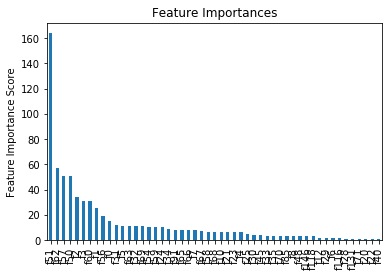

In [28]:
modelfit(xgb.XGBClassifier(silent=False, ), train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y)

<bound method XGBModel.get_params of XGBClassifier(base_score=0.1874486476325611, colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       nthread=-1, objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)>

Model Report
Accuracy : 0.8514
AUC Score (Train): 0.795570

Accuracy : 0.8264
AUC Score (Val): 0.758184


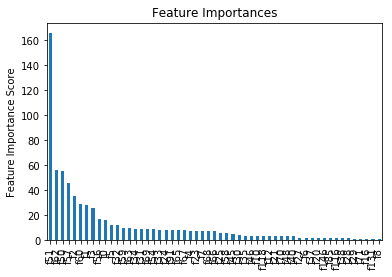

In [31]:
modelfit(xgb.XGBClassifier(base_score=train_y.mean()), train_X=train_X, train_y=train_y, val_X=val_X, val_y=val_y)